# Hotel Cancel Culture - Time Series Modeling and Forecasting

---

**Forecasting Cancellations**

> * **Goal:** Forecast cancellations for the given hotel data
> * **Why:** Predictions only work on preexisting reservations
    * *How can we forecast occupancy without depending on preexisting reservations?*
> * **How:** Using probabilities generated from prior classification modeling to forecast future cancellations

---

[Return to workflow](#return)

# Imports

In [1]:
## JNB tool to reload functions when called
%load_ext autoreload
%autoreload 2

In [2]:
## Data Handling
import pandas as pd
import numpy as np

## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Time Series Modeling
import statsmodels
import statsmodels.tsa.api as tsa
from statsmodels.tsa.seasonal import seasonal_decompose

import pmdarima as pmd
from pmdarima.arima import ndiffs
from pmdarima.arima import nsdiffs

## Custom-made Functions
from bmc_functions import eda
from bmc_functions import time_series_modeling as tsm

In [3]:
## Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)

## Reminder on how to use ihelp function

In [4]:
# import fsds as fs

In [5]:
# fs.ihelp(tsm.ts_split, file_location=True)

# Reading Data

---

**Reading Data and Setting the Datetime Index**

> I will import the data I cleaned and prepped in advance for my modeling processes.
>
> I created an `arrival_date` column during the prep process containing the arrival date as a datetime object. Using this feature, I will reset my index to enable the time series modeling.

---

In [6]:
## Reading data adn setting DT index
source = './data/data_probs.pickle'
data = pd.read_pickle(source, compression = "gzip")
data = data.set_index(data['arrival_date'])
data

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,agent_group,arrival_date,arrival_day,cxl_probability
arrival_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,0,0,0,C,3,No Deposit,0,Transient,0.00,0,0,2015-07-01,999,2015-07-01,Wednesday,0.04
2015-07-01,Resort Hotel,0,737,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,0,0,0,C,4,No Deposit,0,Transient,0.00,0,0,2015-07-01,999,2015-07-01,Wednesday,0.01
2015-07-01,Resort Hotel,0,7,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,0,0,0,A,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,999,2015-07-01,Wednesday,0.01
2015-07-01,Resort Hotel,0,13,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,999,2015-07-01,Wednesday,0.02
2015-07-01,Resort Hotel,0,14,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,0,0,0,A,0,No Deposit,0,Transient,98.00,0,1,2015-07-03,240,2015-07-01,Wednesday,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,City Hotel,0,23,August,35,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,0,0,0,A,0,No Deposit,0,Transient,96.14,0,0,2017-09-06,999,2017-08-30,Wednesday,0.01
2017-08-31,City Hotel,0,102,August,35,31,2,5,3,0.00,0,BB,FRA,Online TA,0,0,0,E,0,No Deposit,0,Transient,225.43,0,2,2017-09-07,9,2017-08-31,Thursday,0.46
2017-08-31,City Hotel,0,34,August,35,31,2,5,2,0.00,0,BB,DEU,Online TA,0,0,0,D,0,No Deposit,0,Transient,157.71,0,4,2017-09-07,9,2017-08-31,Thursday,0.13


---

**Resampling the Arrival Dates**

> My dataset includes multiple reservations per day, which makes sense, but also impairs the modeling process.
>
> **I will resample the data as daily averages for the modeling and forecasting process.**
* *Daily resampling* allows me to view the data for all reservations for a given day.
* *Computing the average cancellations* provides a normalized value allowing for easy comparisons between dates (without having to consider other features, such as occupancy, demand, etc.).

arrival_date
2015-07-01   0.16
2015-07-02   0.61
2015-07-03   0.34
2015-07-04   0.49
2015-07-05   0.30
             ... 
2017-08-27   0.28
2017-08-28   0.30
2017-08-29   0.35
2017-08-30   0.30
2017-08-31   0.34
Freq: D, Name: is_canceled, Length: 793, dtype: float64

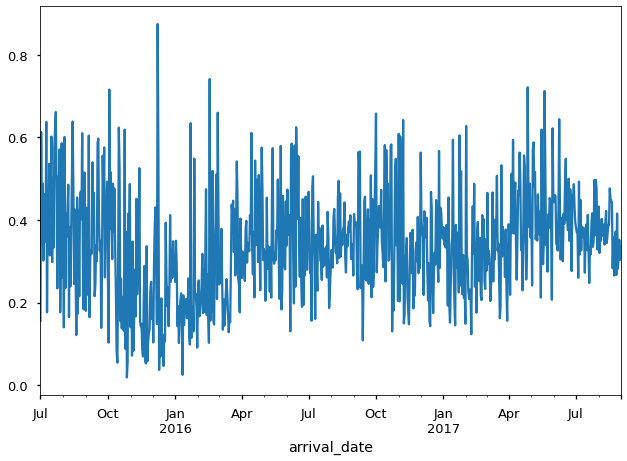

In [7]:
## Resampling for average daily cancellations
ts_avg = data['is_canceled'].resample('D').mean()
display(ts_avg)
ts_avg.plot();

In [8]:
# Pulling subset of data from 2016-17
ts_avg = ts_avg.loc["2016":'2017']
ts_avg

arrival_date
2016-01-01   0.25
2016-01-02   0.35
2016-01-03   0.29
2016-01-04   0.14
2016-01-05   0.19
             ... 
2017-08-27   0.28
2017-08-28   0.30
2017-08-29   0.35
2017-08-30   0.30
2017-08-31   0.34
Freq: D, Name: is_canceled, Length: 609, dtype: float64

In [9]:
## Creating train/test split
split_dict = tsm.ts_split(ts_avg, show_vis=True)

AttributeError: module 'bmc_functions.time_series_modeling' has no attribute 'ts_split'

In [ ]:
## Inspecting results
split_dict['train']

In [ ]:
## Performing seasonal decomp to determine seasonality for modeling
decomp = tsa.seasonal_decompose(split_dict['train'].loc['01-2016':'06-2016'])
# decomp.seasonal.plot(figsize = (15,4));
decomp.plot();

---

**Seasonality**

> Based on the results of the seasonal decomposition, I see there is a weekly seasonality (there are four peaks/valleys per month). This matches up with my expectation that there would be regular stay/cancel patterns based on the day of the week a reservation is due to arrive.
>
> Now that I determined the seasonality, I will use it as an argument in my workflow function (created from a prior time series modeling project).

---

In [ ]:
results = tsm.ts_modeling_workflow(ts_avg, threshold = .85, xlabel='Years',
                                   ylabel = 'Cancellations (%)',
                                   title = 'Forecasted Cancellations', m=7,
                                   show_vis=True)

results.keys()

In [ ]:
results.keys()

In [ ]:
results['model_visuals']['train']['vis']

---

**9/22/21**

- Determined it's too complicated to use the probabilities for TSM for now
    - instead resampled data and generated the average daily cancellations

- Determined "m" via seasonal decomp (also, think about the nature of the data - patterns emerge over the course of a week and repeat).


- Took note of several issues with workflow function
    - show_vis inconsistent
    - results are in a deeply nested dictionary
        - simplify?
    - no progress-tracking print statements

---

---

| --- **Return to workflow** --- | <a name = return></a>

---

---

**Updated 9/24**

- [X] Refactored functions
    - Can set plot labels
    - Can set date for t/t split threshold
- [ ] Simplify nested dictionary
- [ ] Update title for T/T split
- [ ] `model.plot_diagnostics()` needs `plt.tight_layout()`
- [ ] Forecast results poor past 1 month-ish
    - *Any way to improve?*
    
---